Pre-Imputation Summary Statistics:
              yA         yB
count  41.000000  43.000000
mean   24.200488  24.805349
std     2.023067   2.166005
min    20.400000  20.020000
25%    22.410000  23.155000
50%    24.340000  24.990000
75%    25.520000  26.625000
max    29.090000  28.050000

Post-Imputation Summary Statistics:
              yA         yB
count  58.000000  58.000000
mean   24.200488  24.805349
std     1.694739   1.859288
min    20.400000  20.020000
25%    23.015000  23.862500
50%    24.200488  24.805349
75%    25.030000  26.225000
max    29.090000  28.050000


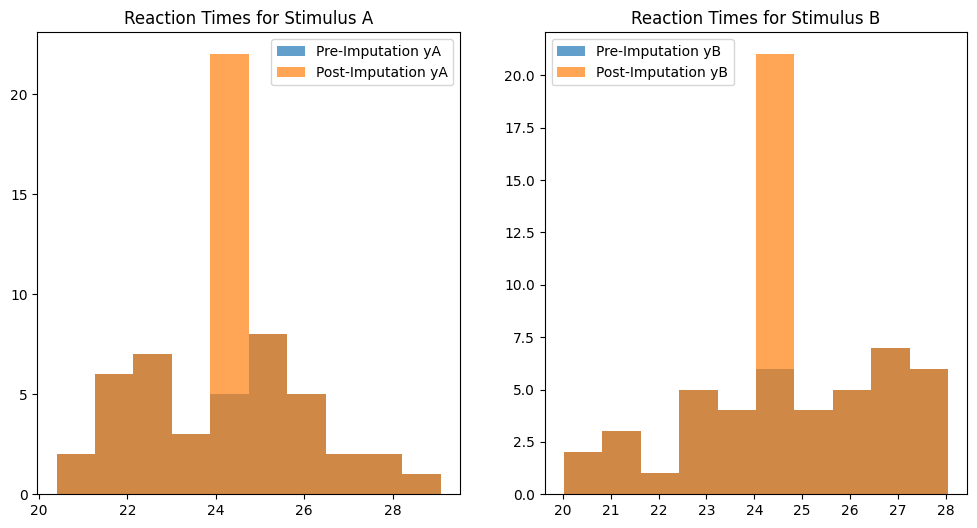


T-test Results: T-statistic = -1.831044458048994, P-value = 0.06970547900850554


In [2]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
data = {
    "yA": [25.33, 26.77, 22.76, 20.94, 25.40, 22.49, 24.54, 20.40, 21.85, 22.21,
           26.21, 22.07, 29.09, 25.00, 22.96, 22.13, 22.91, 25.04, 27.43, 24.34,
           24.08, 25.71, 21.58, 22.13, 26.28, 28.02, 25.24, 24.80, 22.41, 26.08,
           24.29, 25.52, 23.18, 26.67, 24.39, 21.94, 24.93, 22.23, 23.48, 23.48, 25.91,
           np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
           np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "yB": [26.45, 27.53, 20.02, 22.83, 28.05, 23.67, 23.25, 21.38, 24.39, 23.77,
           27.35, 21.44, 27.14, 27.35, 26.61, 25.12, 26.64, 23.01, 27.00, 25.36,
           24.63, 26.77, 23.06, 22.54, 24.36, 24.14, np.nan, np.nan, np.nan, np.nan,
           np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
           np.nan, np.nan, 27.48, 20.32, 24.47, 24.99, 25.41, 27.81, 26.24, 26.08,
           24.67, 23.74, 26.23, 26.89, 22.62, 21.19, 26.21, 26.06, 22.36]
}
df = pd.DataFrame(data)

# Pre-imputation analysis
print("Pre-Imputation Summary Statistics:")
print(df.describe())

# Impute missing values using EM algorithm
def em_imputation(df, max_iter=100, tol=1e-6):
    # Initialize missing values with column means
    df_imputed = df.copy()
    for col in df.columns:
        df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)
    
    # EM algorithm
    for i in range(max_iter):
        # E-step: Fit Gaussian Mixture Model
        gmm = GaussianMixture(n_components=1, random_state=42)
        gmm.fit(df_imputed)
        
        # M-step: Update missing values
        prev_imputed = df_imputed.copy()
        for col in df.columns:
            missing = df[col].isnull()
            if missing.sum() > 0:
                df_imputed.loc[missing, col] = gmm.means_[0][list(df.columns).index(col)]
        
        # Check for convergence
        if np.allclose(prev_imputed, df_imputed, atol=tol):
            break
    
    return df_imputed

df_imputed = em_imputation(df)

# Post-imputation analysis
print("\nPost-Imputation Summary Statistics:")
print(df_imputed.describe())

# Compare distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["yA"].dropna(), bins=10, alpha=0.7, label="Pre-Imputation yA")
plt.hist(df_imputed["yA"], bins=10, alpha=0.7, label="Post-Imputation yA")
plt.legend()
plt.title("Reaction Times for Stimulus A")

plt.subplot(1, 2, 2)
plt.hist(df["yB"].dropna(), bins=10, alpha=0.7, label="Pre-Imputation yB")
plt.hist(df_imputed["yB"], bins=10, alpha=0.7, label="Post-Imputation yB")
plt.legend()
plt.title("Reaction Times for Stimulus B")
plt.show()

# Statistical test
t_stat, p_value = ttest_ind(df_imputed["yA"], df_imputed["yB"])
print(f"\nT-test Results: T-statistic = {t_stat}, P-value = {p_value}")